In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from daugman import find_iris

## Demo

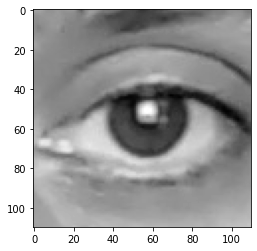

In [2]:
# read, square crop and grayscale image of an eye
img = cv2.imread('eye.jpg')
img = img[20:130, 20:130]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_ = plt.imshow(gray_img, cmap='gray')

We are considering every pixel in the central third of the image as possible iris center.
But we could reduce that number with `points_step`.   
*It has linear correlation with overall iris search speed.*


For each possible iris center we will consider different radii, given as `range(daugman_start, daugman_end, daugman_step)`.   
*The `daugman_step` has linear correlation with overall iris search speed.*

See `daugman_visual_explanation.ipynb` for details

In [3]:
# minimal iris radius -- 10px
# maximal iris radius -- 30px
answer = find_iris(gray_img, daugman_start=10, daugman_end=30, daugman_step=2, points_step=2)
print(answer)

iris_center, iris_rad = answer

((58, 56), 18)


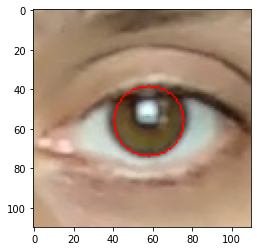

In [4]:
# plot result
out = img.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])

## Speed measurement

Play with `daugman_step` and `points_step` params.

In [5]:
%%timeit
find_iris(gray_img, daugman_start=10, daugman_end=30, daugman_step=2, points_step=2)

58 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Function profiling

In [6]:
import cProfile

cProfile.run('find_iris(gray_img, daugman_start=10, daugman_end=30)')

         150182 function calls (147294 primitive calls) in 0.504 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1444    0.001    0.000    0.007    0.000 <__array_function__ internals>:2(argmax)
     1444    0.001    0.000    0.003    0.000 <__array_function__ internals>:2(copyto)
     1444    0.001    0.000    0.003    0.000 <__array_function__ internals>:2(empty_like)
     1444    0.001    0.000    0.013    0.000 <__array_function__ internals>:2(zeros_like)
        1    0.000    0.000    0.504    0.504 <string>:1(<module>)
        1    0.002    0.002    0.504    0.504 daugman.py:59(find_iris)
     1444    0.331    0.000    0.501    0.000 daugman.py:8(daugman)
     1444    0.000    0.000    0.000    0.000 fromnumeric.py:1115(_argmax_dispatcher)
     1444    0.001    0.000    0.005    0.000 fromnumeric.py:1119(argmax)
     1444    0.001    0.000    0.004    0.000 fromnumeric.py:52(_wrapfunc)
     1444    0.000    0.000